<div align = "center">
    <img src = "https://github.com/AndersonAyache/AluraVoz/blob/main/IMG/Logo_Alura_Voz.png?raw=true" alt = "Alura Voz"/>
</div>

# Importando as bibliotecas

In [1]:
# sys (para conseguir abrir as pastas)
import sys
sys.path.append('../')

# meu arquivo de suporte
import suporte.suportedata as sd

#pandas
import pandas as pd

#numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# seaborn
import seaborn as sns

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# acuracia
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# imblearn (balanceamento)
from imblearn.over_sampling import SMOTE


SEED = 42

In [2]:
# configurações de visualização do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Importando os dados

In [3]:
# importando os dados
clientes = pd.read_json('../dados/Telco-Customer-Churn-Limpo.json')

# visualizando os dados
clientes.head()

,Churn,genero,senior,conjuge,dependentes,permanencia,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaOnline,MetodoDePagamento,GastoMensal,GastoTotal,GastoDiario
0,Não,Mulher,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,UmAno,Sim,EnvioDeCheque,65.6,593.30,2.19
1,Não,Homem,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,EnvioDeCheque,59.9,542.40,2.00
2,Sim,Homem,0,Não,Não,4,Sim,Não,FibraOptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,ChequeEletronico,73.9,280.85,2.46
3,Sim,Homem,1,Sim,Não,13,Sim,Não,FibraOptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,ChequeEletronico,98.0,1237.85,3.27
4,Sim,Mulher,1,Sim,Não,3,Sim,Não,FibraOptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,EnvioDeCheque,83.9,267.40,2.80


<div align = "center">
    <img src = "https://raw.githubusercontent.com/AndersonAyache/AluraVoz/main/IMG/matrix_corelacao.png" alt = "Correlação das variáveis", width = 900/>
</div>

É crucial lembrar que variáveis com alta correlação podem afetar negativamente o desempenho do modelo. Portanto, algumas destas variáveis serão retiradas. 

In [4]:
drop_colunas = ['GastoTotal','GastoDiario','ServicoInternet','MetodoDePagamento']
clientes_v01 = clientes.drop(drop_colunas, axis = 1)

Para criar modelos de machine learning, é necessário codificar as variáveis categóricas em colunas binárias através de uma técnica apropriada, como a codificação "dummy".

In [5]:
clientes_v02 = clientes.copy()
for i in clientes_v02.columns:
    if set(clientes_v02[i].unique()) == {'Sim', 'Não'}:
        clientes_v02[i].replace({'Sim':1, 'Não':0}, inplace=True)
        
clientes_v02

,Churn,genero,senior,conjuge,dependentes,permanencia,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaOnline,MetodoDePagamento,GastoMensal,GastoTotal,GastoDiario
0,0,Mulher,0,1,1,9,1,Não,DSL,Não,Sim,Não,Sim,Sim,Não,UmAno,1,EnvioDeCheque,65.60,593.30,2.19
1,0,Homem,0,0,0,9,1,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,0,EnvioDeCheque,59.90,542.40,2.00
2,1,Homem,0,0,0,4,1,Não,FibraOptica,Não,Não,Sim,Não,Não,Não,Mensal,1,ChequeEletronico,73.90,280.85,2.46
3,1,Homem,1,1,0,13,1,Não,FibraOptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,1,ChequeEletronico,98.00,1237.85,3.27
4,1,Mulher,1,1,0,3,1,Não,FibraOptica,Não,Não,Não,Sim,Sim,Não,Mensal,1,EnvioDeCheque,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Mulher,0,0,0,13,1,Não,DSL,Sim,Não,Não,Sim,Não,Não,UmAno,0,EnvioDeCheque,55.15,742.90,1.84
7263,1,Homem,0,1,0,22,1,Sim,FibraOptica,Não,Não,Não,Não,Não,Sim,Mensal,1,ChequeEletronico,85.10,1873.70,2.84
7264,0,Homem,0,0,0,2,1,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,1,EnvioDeCheque,50.30,92.75,1.68
7265,0,Homem,0,1,1,67,1,Não,DSL,Sim,Não,Sim,Sim,Não,Sim,DoisAnos,0,EnvioDeCheque,67.85,4627.65,2.26


In [6]:
# criando novo DataFrame com o método dummy
clientes_dummy = pd.get_dummies(clientes_v02)

clientes_dummy.head()

,Churn,senior,conjuge,dependentes,permanencia,ServicoTelefonico,FaturaOnline,GastoMensal,GastoTotal,GastoDiario,genero_Homem,genero_Mulher,MultiplasLinhas_Não,MultiplasLinhas_SemTelefone,MultiplasLinhas_Sim,ServicoInternet_DSL,ServicoInternet_FibraOptica,ServicoInternet_Não,SeguroOnline_Não,SeguroOnline_SemInternet,SeguroOnline_Sim,OnlineBackup_Não,OnlineBackup_SemInternet,OnlineBackup_Sim,ProtecaoDoDispositivo_Não,ProtecaoDoDispositivo_SemInternet,ProtecaoDoDispositivo_Sim,SuporteTecnico_Não,SuporteTecnico_SemInternet,SuporteTecnico_Sim,StreamingTV_Não,StreamingTV_SemInternet,StreamingTV_Sim,StreamingFilmes_Não,StreamingFilmes_SemInternet,StreamingFilmes_Sim,contrato_DoisAnos,contrato_Mensal,contrato_UmAno,MetodoDePagamento_CartaoCredito,MetodoDePagamento_ChequeEletronico,MetodoDePagamento_EnvioDeCheque,MetodoDePagamento_TransferenciaBancaria
0,0,0,1,1,9,1,1,65.6,593.30,2.19,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,9,1,0,59.9,542.40,2.00,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,1,0,0,0,4,1,1,73.9,280.85,2.46,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.27,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
4,1,1,1,0,3,1,1,83.9,267.40,2.80,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0


# Modelos de Machine Learning

## Preparação para os modelos

A normalização é uma etapa importante para melhorar o desempenho do modelo de machine learning, por isso, o DataFrame será normalizado e também será criada uma versão balanceada dos dados, para evitar tendências do modelo para valores mais frequentes. Neste processo, dados similares serão gerados de forma que a variável `Churn` tenha a mesma quantidade de elementos.

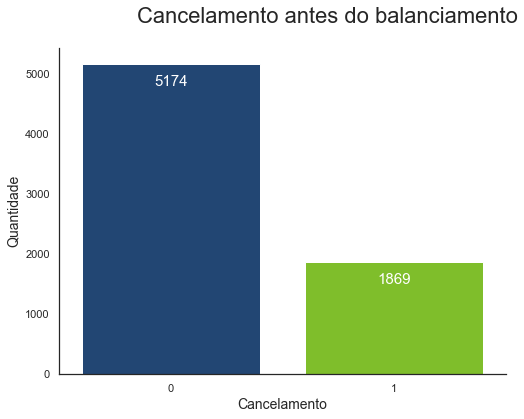

In [7]:
sd.plot_comparacao(data=clientes_v02,x='Churn', title='Cancelamento antes do balanciamento', 
                xlabel='Cancelamento',figsize=(8,6))

### Normalização

In [8]:
# separação das variáveis
X =  clientes_dummy.drop(['Churn'],axis = 1)
y = clientes_dummy.Churn

# instânciamentro 
norm = StandardScaler()

# transformação
X_norm = norm.fit_transform(X)

# print
X_norm[0]

array([-0.43991649,  1.03453023,  1.5290241 , -0.95168167,  0.32743831,
        0.8297975 ,  0.02786194, -0.74402601,  0.03123051, -1.00955867,
        1.00955867,  1.03806605, -0.32743831, -0.85417615,  1.38171215,
       -0.88565976, -0.52592737,  1.00669571, -0.52592737, -0.63393298,
       -0.88361972, -0.52592737,  1.3782406 ,  1.12942721, -0.52592737,
       -0.72396752, -0.98632101, -0.52592737,  1.56387171, -0.81475874,
       -0.52592737,  1.26561178,  1.23648892, -0.52592737, -0.79607014,
       -0.56297505, -1.1059698 ,  1.94458183, -0.52504733, -0.71102597,
        1.83551265, -0.5298852 ])

### Balanciamento

In [9]:
sm = SMOTE(random_state=SEED)

X_b, y_b = sm.fit_resample(X_norm, y)

In [10]:
clientes_v03 = pd.concat([pd.DataFrame(y_b), pd.DataFrame(X_b)], axis = 1)
clientes_v03.columns = clientes_dummy.columns
clientes_v03

,Churn,senior,conjuge,dependentes,permanencia,ServicoTelefonico,FaturaOnline,GastoMensal,GastoTotal,GastoDiario,genero_Homem,genero_Mulher,MultiplasLinhas_Não,MultiplasLinhas_SemTelefone,MultiplasLinhas_Sim,ServicoInternet_DSL,ServicoInternet_FibraOptica,ServicoInternet_Não,SeguroOnline_Não,SeguroOnline_SemInternet,SeguroOnline_Sim,OnlineBackup_Não,OnlineBackup_SemInternet,OnlineBackup_Sim,ProtecaoDoDispositivo_Não,ProtecaoDoDispositivo_SemInternet,ProtecaoDoDispositivo_Sim,SuporteTecnico_Não,SuporteTecnico_SemInternet,SuporteTecnico_Sim,StreamingTV_Não,StreamingTV_SemInternet,StreamingTV_Sim,StreamingFilmes_Não,StreamingFilmes_SemInternet,StreamingFilmes_Sim,contrato_DoisAnos,contrato_Mensal,contrato_UmAno,MetodoDePagamento_CartaoCredito,MetodoDePagamento_ChequeEletronico,MetodoDePagamento_EnvioDeCheque,MetodoDePagamento_TransferenciaBancaria
0,0,-0.439916,1.034530,1.529024,-0.951682,0.327438,0.829798,0.027862,-0.744026,0.031231,-1.009559,1.009559,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,1.006696,-0.525927,-0.633933,-0.883620,-0.525927,1.378241,1.129427,-0.525927,-0.723968,-0.986321,-0.525927,1.563872,-0.814759,-0.525927,1.265612,1.236489,-0.525927,-0.796070,-0.562975,-1.105970,1.944582,-0.525047,-0.711026,1.835513,-0.529885
1,0,-0.439916,-0.966622,-0.654012,-0.951682,0.327438,-1.205113,-0.161583,-0.766482,-0.158198,0.990532,-0.990532,-0.963330,-0.327438,1.170719,1.381712,-0.885660,-0.525927,1.006696,-0.525927,-0.633933,1.131709,-0.525927,-0.725563,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,-0.808742,-0.525927,1.256171,-0.562975,0.904184,-0.514249,-0.525047,-0.711026,1.835513,-0.529885
2,1,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,0.829798,0.303720,-0.881874,0.300419,0.990532,-0.990532,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,1.131709,-0.525927,-0.725563,-0.885405,-0.525927,1.381277,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,-0.562975,0.904184,-0.514249,-0.525047,1.406418,-0.544807,-0.529885
3,1,2.273159,1.034530,-0.654012,-0.788800,0.327438,0.829798,1.104706,-0.459662,1.107982,0.990532,-0.990532,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,-0.883620,-0.525927,1.378241,-0.885405,-0.525927,1.381277,1.013869,-0.525927,-0.639439,-0.814759,-0.525927,1.265612,-0.808742,-0.525927,1.256171,-0.562975,0.904184,-0.514249,-0.525047,1.406418,-0.544807,-0.529885
4,1,2.273159,1.034530,-0.654012,-1.196004,0.327438,0.829798,0.636080,-0.887808,0.639396,-1.009559,1.009559,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,1.131709,-0.525927,-0.725563,1.129427,-0.525927,-0.723968,-0.986321,-0.525927,1.563872,-0.814759,-0.525927,1.265612,1.236489,-0.525927,-0.796070,-0.562975,0.904184,-0.514249,-0.525047,-0.711026,1.835513,-0.529885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,2.273159,-0.966622,-0.654012,-0.827079,0.327438,0.829798,0.672624,-0.556648,0.669811,-1.009559,1.009559,-0.963330,-0.327438,1.170719,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,1.131709,-0.525927,-0.725563,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,-0.814759,-0.525927,1.265612,1.236489,-0.525927,-0.796070,-0.562975,0.904184,-0.514249,-0.525047,1.406418,-0.544807,-0.529885
10344,1,2.273159,0.568820,-0.654012,-1.052075,0.327438,0.829798,0.836897,-0.730533,0.835096,0.990532,-0.990532,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,1.131709,-0.525927,-0.725563,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,-0.814759,-0.525927,1.265612,-0.808742,-0.525927,1.256171,-0.562975,0.904184,-0.514249,-0.525047,1.406418,-0.544807,-0.529885
10345,1,-0.439916,-0.819869,-0.654012,-1.190031,0.327438,-1.205113,-1.493901,-0.975312,-1.495630,0.9905

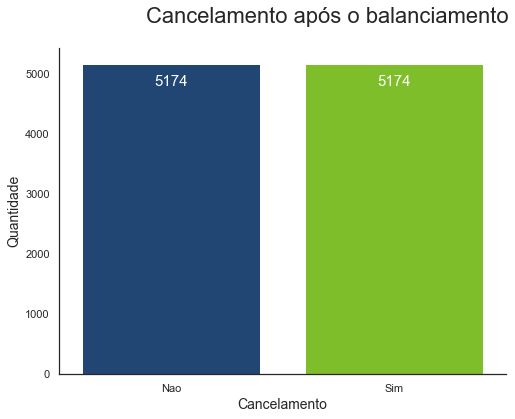

In [11]:
sd.plot_comparacao(data=clientes_v03,x='Churn', title='Cancelamento após o balanciamento', 
                xlabel='Cancelamento',figsize=(8,6), xticks=['Nao', 'Sim'])

## Crianção do modelo 

In [12]:
# separando em modelo de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_b, y_b, random_state=SEED)

### SVC

In [13]:
# importando o modelo SVC
from sklearn.svm import SVC

svc = SVC(random_state=SEED)
svc.fit(X_treino, y_treino)

y_pred_svc = svc.predict(X_teste)

In [14]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]

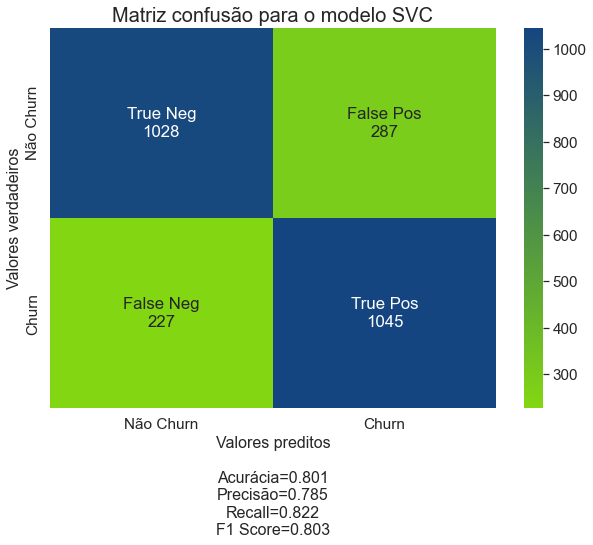

In [15]:
sd.matriz_confusao(y_true_teste = y_teste, y_pred_teste= y_pred_svc,
                   group_names= labels, categories=categories,
                   title='Matriz confusão para o modelo SVC')

### Decision Tree

In [16]:
# importando o modelo Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtree.fit(X_treino, y_treino)

y_pred_dtree = dtree.predict(X_teste)

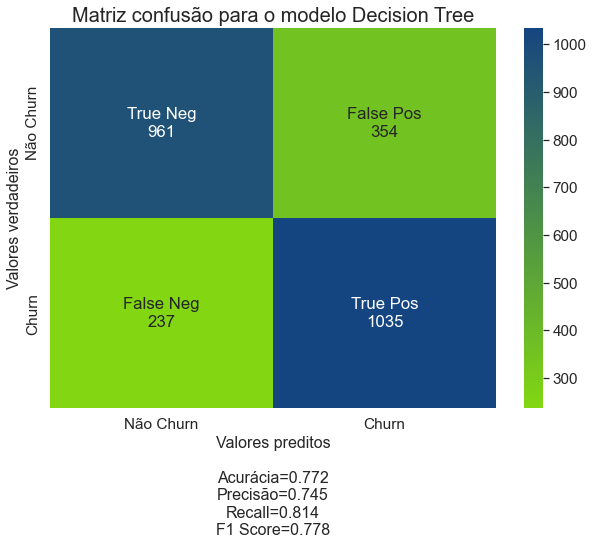

In [17]:
sd.matriz_confusao(y_true_teste = y_teste,y_pred_teste = y_pred_dtree,
                   group_names= labels, categories = categories,
                   title = 'Matriz confusão para o modelo Decision Tree')

### Random Forest

In [18]:
# importando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(max_depth=5,random_state=SEED)
rforest.fit(X_treino, y_treino)

y_pred_rforest = rforest.predict(X_teste)

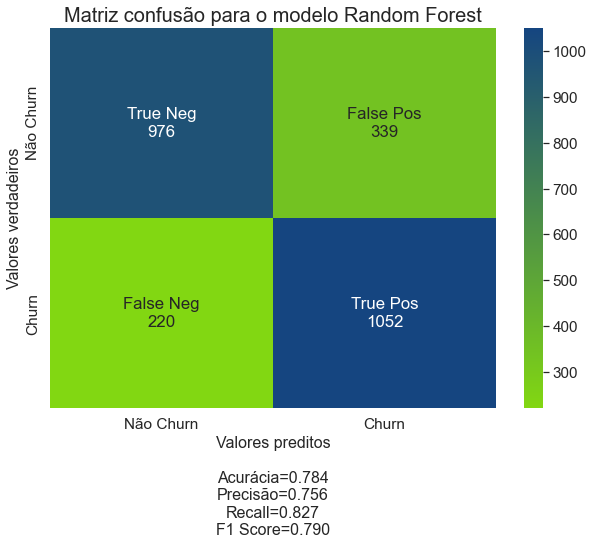

In [19]:
sd.matriz_confusao(y_teste, y_pred_rforest,
                   labels ,categories,
                   title='Matriz confusão para o modelo Random Forest')

### Bernoulli 

In [20]:
# importando o modelo Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=np.median(X_treino))
bnb.fit(X_treino, y_treino)

y_pred_bnb = bnb.predict(X_teste)

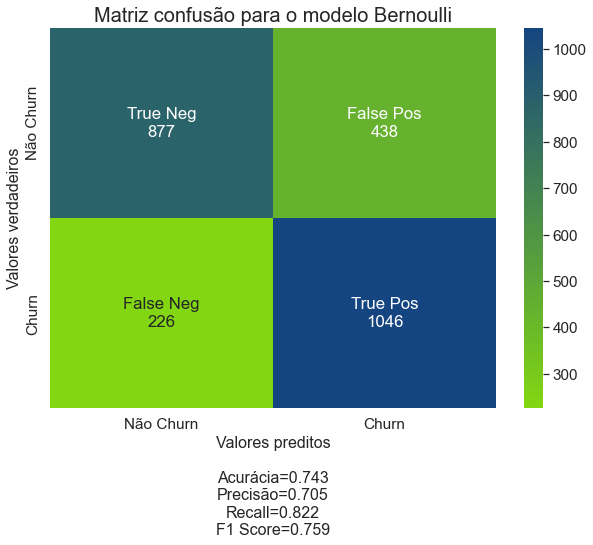

In [21]:
sd.matriz_confusao(y_true_teste = y_teste,y_pred_teste = y_pred_bnb,
                   group_names = labels ,categories = categories,
                   title ='Matriz confusão para o modelo Bernoulli')

### KNeighborsClassifier

In [22]:
# importando o modelo K Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_treino, y_treino)

y_pred_knn = knn.predict(X_teste)

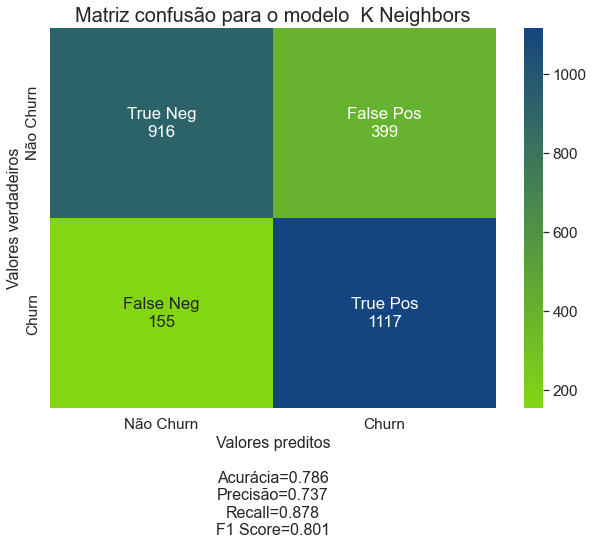

In [23]:
sd.matriz_confusao(y_true_teste = y_teste,y_pred_teste = y_pred_knn,
                   group_names = labels ,categories = categories,
                   title ='Matriz confusão para o modelo  K Neighbors')

## Análise dos modelos

In [24]:
modelos = ['knn','Bernoulli','svc', 'decision tree', 'random forest']
y_pred_treinos = [knn.predict(X_treino), bnb.predict(X_treino) ,svc.predict(X_treino), dtree.predict(X_treino),  .predict(X_treino)]
y_pred_testes = [y_pred_knn, y_pred_bnb,y_pred_svc, y_pred_dtree, y_pred_rforest]

In [25]:
tabela_modelos = sd.compara_modelos_metricas(metrica='Recall', nomes_modelos=modelos,
                                             y_true_treino=y_treino, y_pred_treinos=y_pred_treinos,
                                             y_true_teste= y_teste, y_pred_testes=y_pred_testes)
tabela_modelos.round(4)

,Modelo,Acurácia Treino,Acurácia Teste,Precisão,Recall,F1-Score
0,knn,0.8472,0.7859,0.7368,0.8781,0.8013
1,random forest,0.8030,0.7839,0.7563,0.8270,0.7901
2,Bernoulli,0.7572,0.7433,0.7049,0.8223,0.7591
3,svc,0.8339,0.8013,0.7845,0.8215,0.8026
4,decision tree,0.7886,0.7716,0.7451,0.8137,0.7779


A elevada pontuação de recall de 0.8781 alcançada pelo algoritmo K-Nearest Neighbors (KNN) foi o fator determinante para sua escolha como a opção ideal para prevenir o cancelamento de clientes, garantindo a detecção precisa dos clientes propensos a cancelar e evitando a perda de receita.